In [61]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibm-runtime

In [62]:
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister,transpile
import qiskit.quantum_info as qi
import matplotlib
from qiskit_aer import AerSimulator

#**Unconstrained Grover Search for marked element in 3 qubits**

|0⟩

$\sqrt2$
π
|Ψ⟩

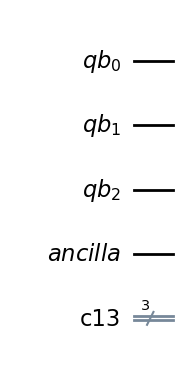

In [63]:
qubits = QuantumRegister(3, "qb")
ancilla = QuantumRegister(1,"ancilla")
output = ClassicalRegister(3)
qc = QuantumCircuit(qubits,ancilla,output)

qc.draw("mpl")


Lets Say that the marked state was the string 110

## ORACLE

If the Oracle is some operator O:

$O |x⟩|ancilla⟩$ = $(-1)^f |x⟩|ancilla⟩$  where |x⟩ is some input state given to the circuit.

**f** is a function which for on x:

if |x⟩ = marked_state : f = 1

if |x⟩ != marked state : f = 0

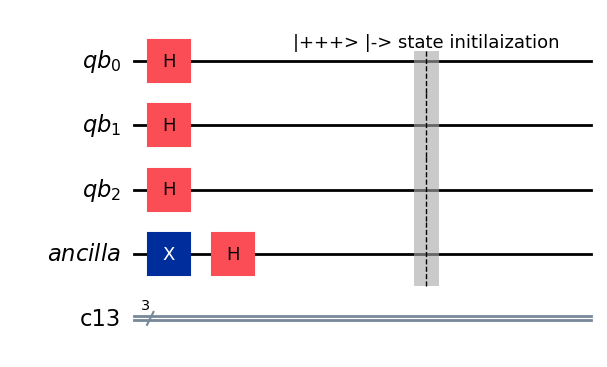

In [64]:
##### Creating Superposition of all input states ""
qc.x(ancilla[0])
qc.h(ancilla[0])
qc.h(qubits)
qc.barrier(label ="|+++> |-> state initilaization")
qc.draw("mpl")

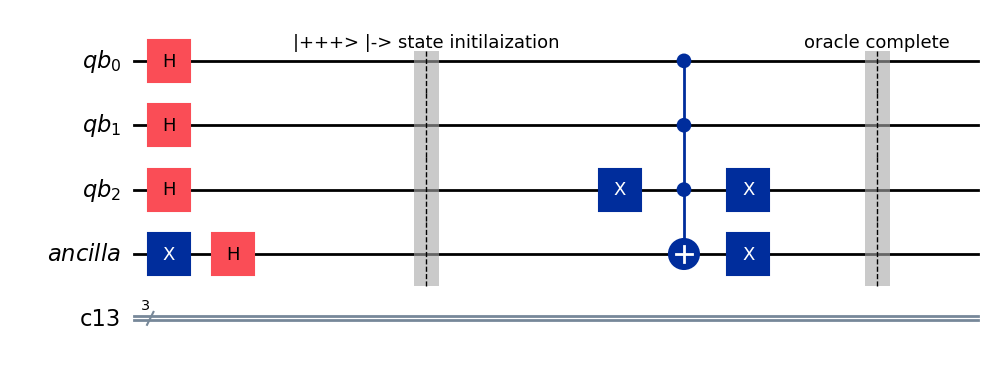

In [65]:
## ORACLE of 110 state##

qc.x(qubits[2])
qc.mcx(qubits,ancilla[0])
qc.x(qubits[2])
qc.x(ancilla)
qc.barrier(label= "oracle complete" )
qc.draw("mpl")

##DIFFUSER

The Diffuser is an Operator:
$D = 2|+⟩^n⟨+|^n - 𝕀$

The Diffuser causes amplitude amplification in the Grover subroutine

D can be implemented as:
$D = H^n X^n (MCZ) X^nH^n$

Where MCZ is a muli-qubit controlled Z gate

*The Derivation of the above expressions is discussed in the Documentation PDF

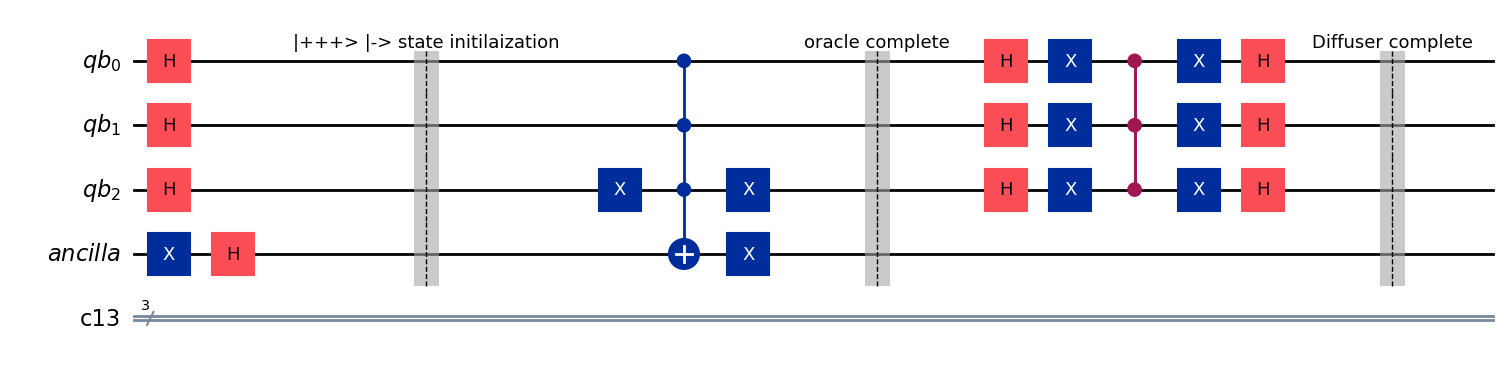

In [66]:
qc.h(qubits)
qc.x(qubits)
qc.ccz(qubits[0],qubits[1],qubits[2])
qc.x(qubits)
qc.h(qubits)
qc.barrier(label="Diffuser complete")
qc.draw("mpl")

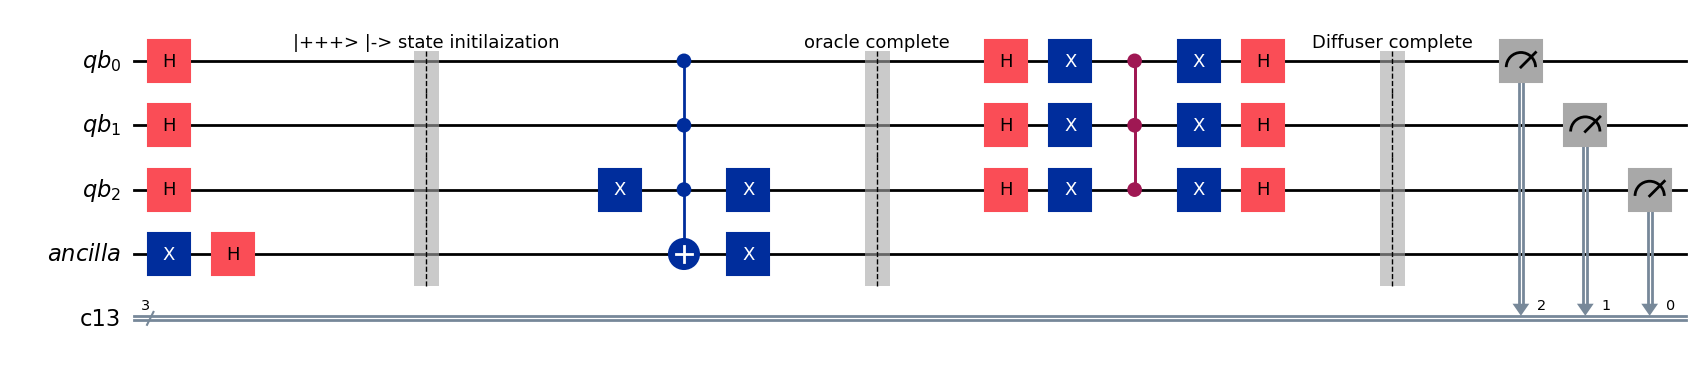

In [67]:
qc.measure(qubits[0],output[2])
qc.measure(qubits[1],output[1])
qc.measure(qubits[2],output[0])
qc.draw("mpl")

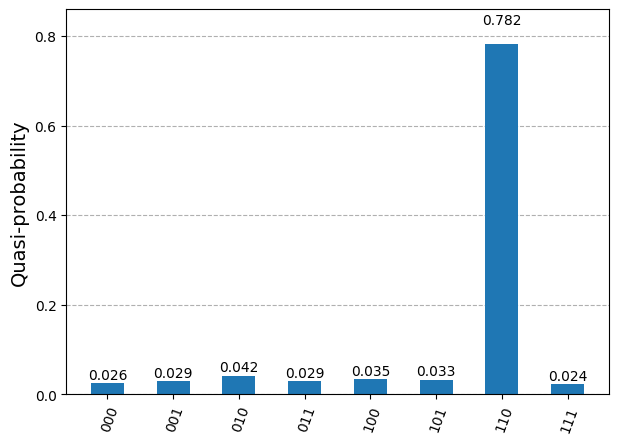

In [68]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see that with a very high probability(78.5%) we get output bits 110 which was the marked element in our example

#**Constrained Grover Search for a Marked element in 3 qubits**

##**Constraint 1 : No ancilla Qubit**

If we wish to mark an element in the datatbase and use amplitude amplifiication on it but without the use of an ancilla qubits, we must change our oracle function a bit.

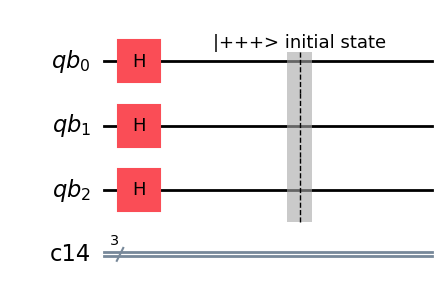

In [69]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
qc1.draw("mpl")

###**Input the element to be marked by the oracle:**

In [70]:
inp = input("enter a binary string of length 3 :    " )
if (len(inp)!=3):print("Invalid input: run cell again")

enter a binary string of length 3 :    011


In [71]:
def oracle(qc,inp,n):
  for i in range(len(inp)):
    if inp[i]=='0':
      qc.x(qubits[i])

  qc.ccz(qubits[0],qubits[1],qubits[2])
  for i in range(len(inp)):
    if inp[i]=='0':
      qc.x(qubits[i])

  qc.barrier(label= f"Oracle_{n} complete")

In [72]:
def diffuser(qc,n):
  qc.h(qubits)
  qc.x(qubits)
  qc.ccz(qubits[0],qubits[1],qubits[2])
  qc.x(qubits)
  qc.h(qubits)
  qc.barrier(label=f"Diffuser_{n} complete")

###Circuit for Oracle and diffuser applied once

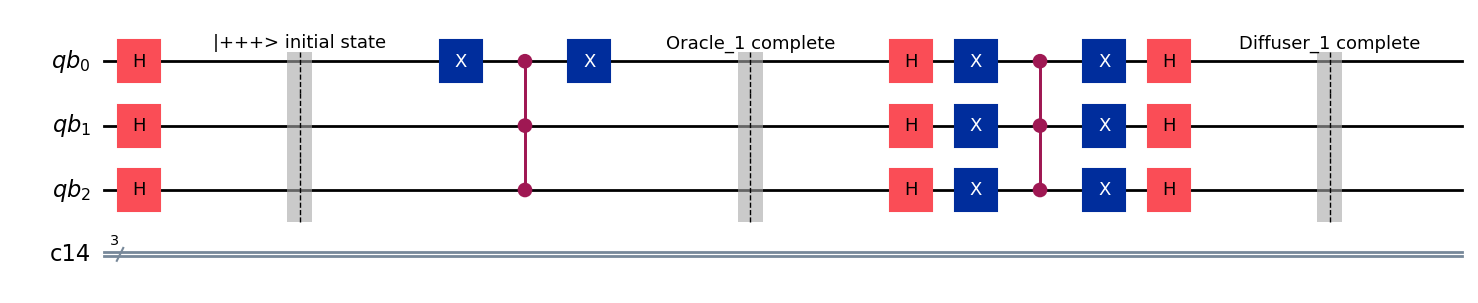

In [73]:
oracle(qc1,inp,1)
diffuser(qc1,1)
qc1.draw("mpl")

Measurement

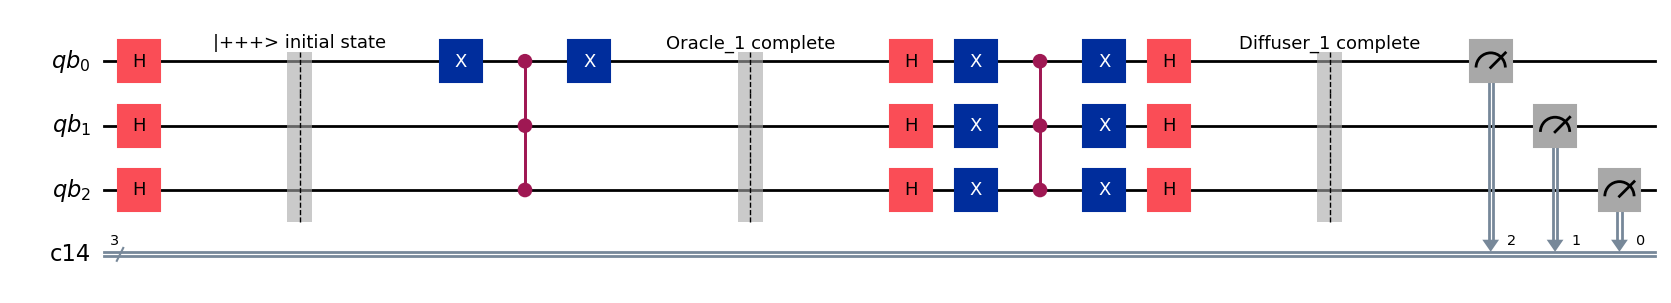

In [74]:
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

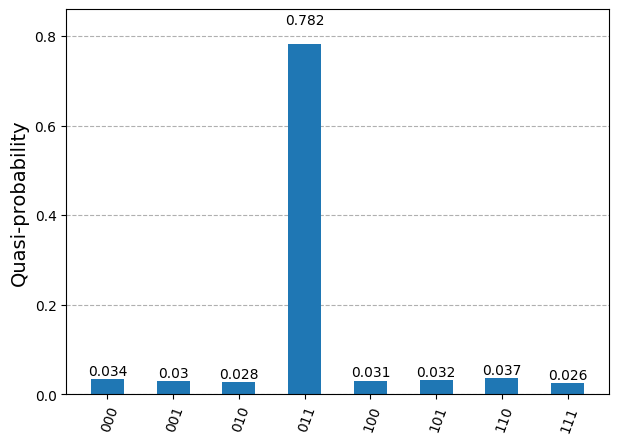

In [75]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see we get the marked string with high probability

###Circuit with Oracle and Diffuser Apllied twice:

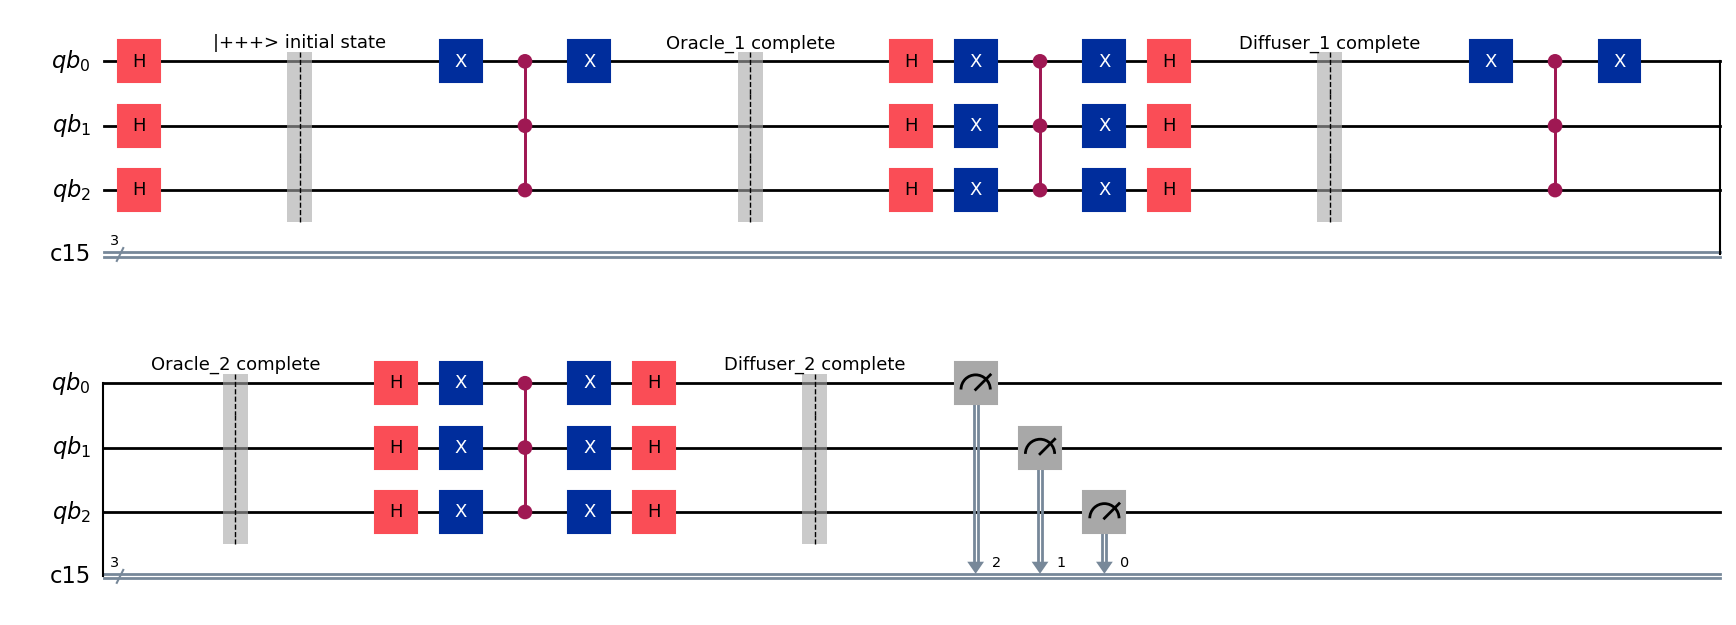

In [76]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
oracle(qc1,inp,1)
diffuser(qc1,1)
oracle(qc1,inp,2)
diffuser(qc1,2)
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

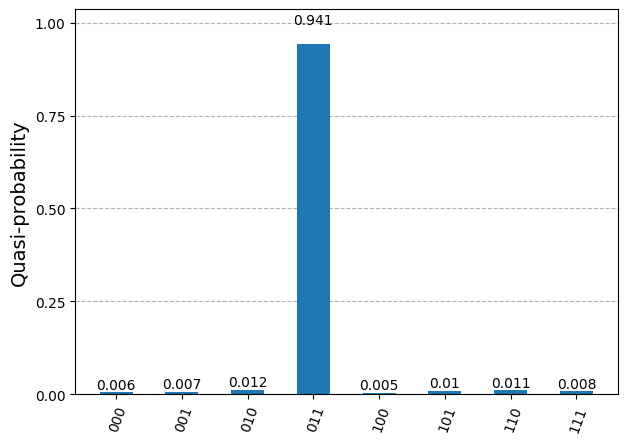

In [77]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see the output string 011 appears with even higher probability of around 95%  which has incresed significantly from the previous around 80%

###Circuit with Oracle and Diffuser Apllied three times:

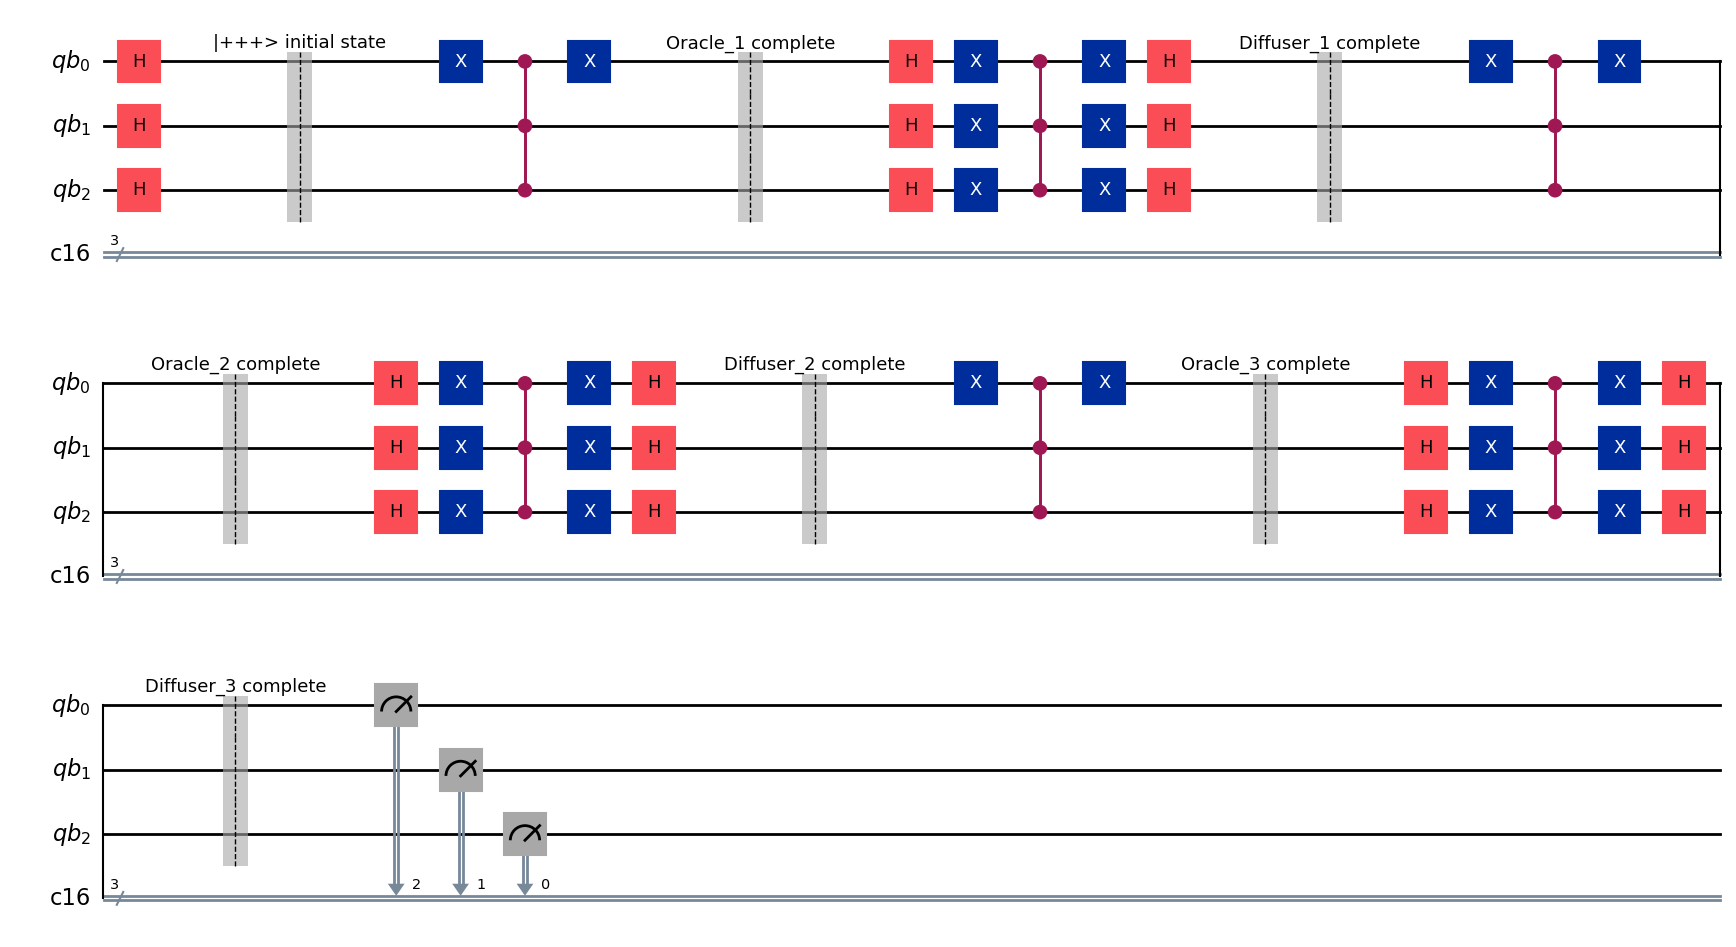

In [78]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
oracle(qc1,inp,1)
diffuser(qc1,1)
oracle(qc1,inp,2)
diffuser(qc1,2)
oracle(qc1,inp,3)
diffuser(qc1,3)
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

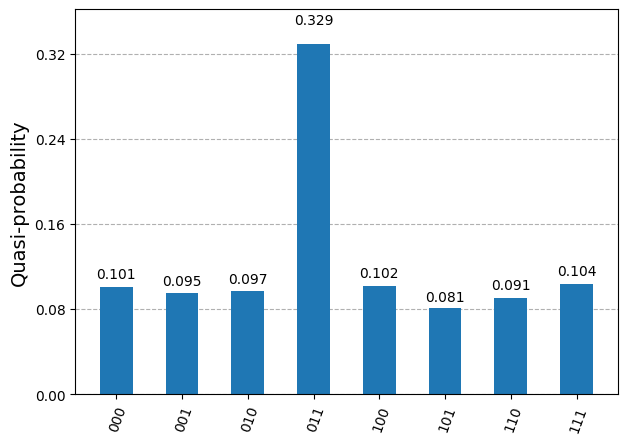

In [79]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see now the probabilies for the correct answer has again gone down

Hence we must apply the oracle diffuser pair a maximum of $⌊\sqrt n⌋$ for a database of n elements

**note: n isn't the number of qubit**

no. of qubits(q) = $log_2(n)$

for 3 qubits n=8

Hence $⌊\sqrt 8⌋$ = 2

##**Constraint 2 : Z and controlled Z gates not allowed**

If we want to run the same Quantum Circuit discussed abouve but we don't have access to Z gate or Controlled Z gates (controlled on any no. of qubits)

In this case we can modify the circuit such that every Z gate is replaced by HXH gates

$Z = HXH$

And every Multi-Controlled Z = H (Multi-Controlled X) H  gates

This way the enitire Grover Seach can be done using only X and H gates without any ancillas.

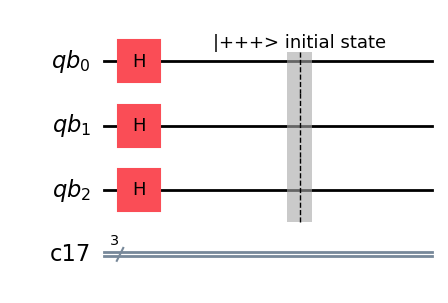

In [80]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
qc1.draw("mpl")

###**Input the element to be marked by the oracle:**

In [81]:
inp = input("enter a binary string of length 3 :    " )
if (len(inp)!=3):print("Invalid input: run cell again")

enter a binary string of length 3 :    101


In [82]:
def oracle_X(qc,inp,n):
  for i in range(len(inp)):
    if inp[i]=='0':
      qc.x(qubits[i])

  qc.h(qubits[2])
  qc.ccx(qubits[0],qubits[1],qubits[2])
  qc.h(qubits[2])
  for i in range(len(inp)):
    if inp[i]=='0':
      qc.x(qubits[i])

  qc.barrier(label= f"Oracle_{n} complete")

In [83]:
def diffuser_X(qc,n):
  qc.h(qubits)
  qc.x(qubits)

  qc.h(qubits[2])
  qc.ccx(qubits[0],qubits[1],qubits[2])
  qc.h(qubits[2])

  qc.x(qubits)
  qc.h(qubits)
  qc.barrier(label=f"Diffuser_{n} complete")

###Circuit for Oracle and diffuser applied once

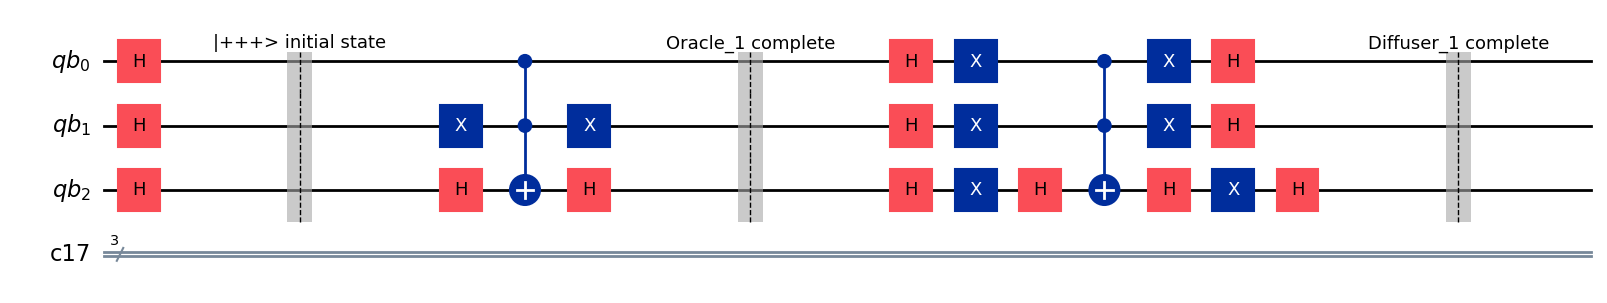

In [84]:
oracle_X(qc1,inp,1)
diffuser_X(qc1,1)
qc1.draw("mpl")

Measurement

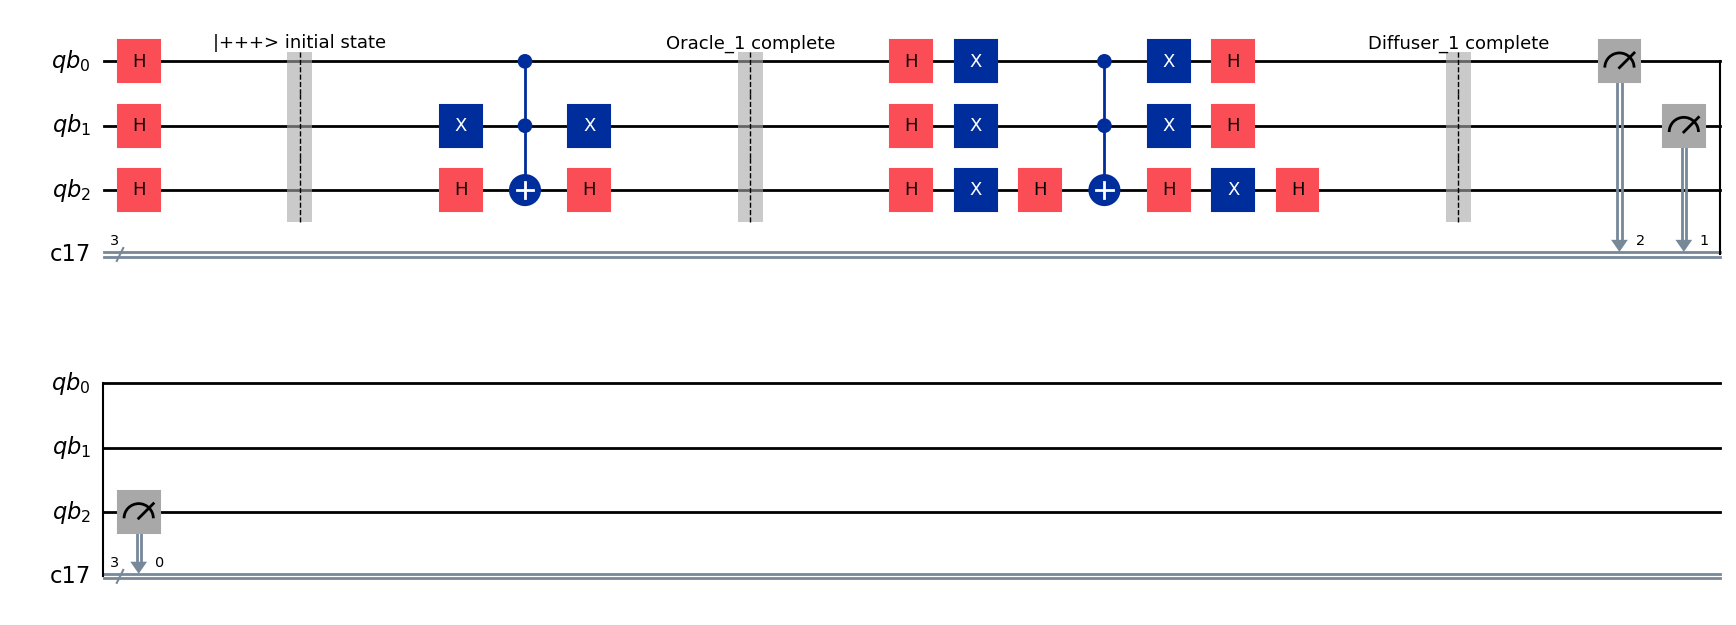

In [85]:
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

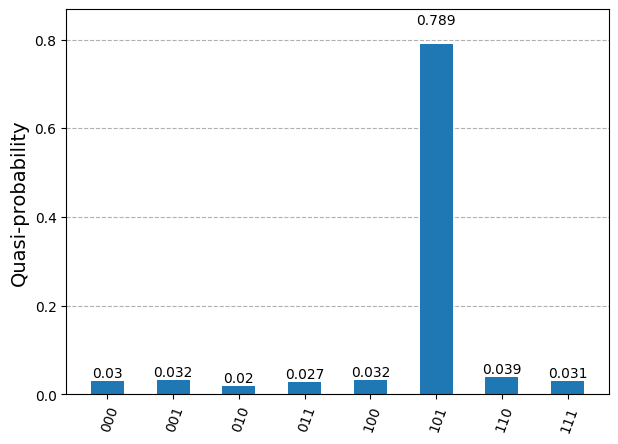

In [86]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see we get the marked string with high probability

###Circuit with Oracle and Diffuser Apllied twice:

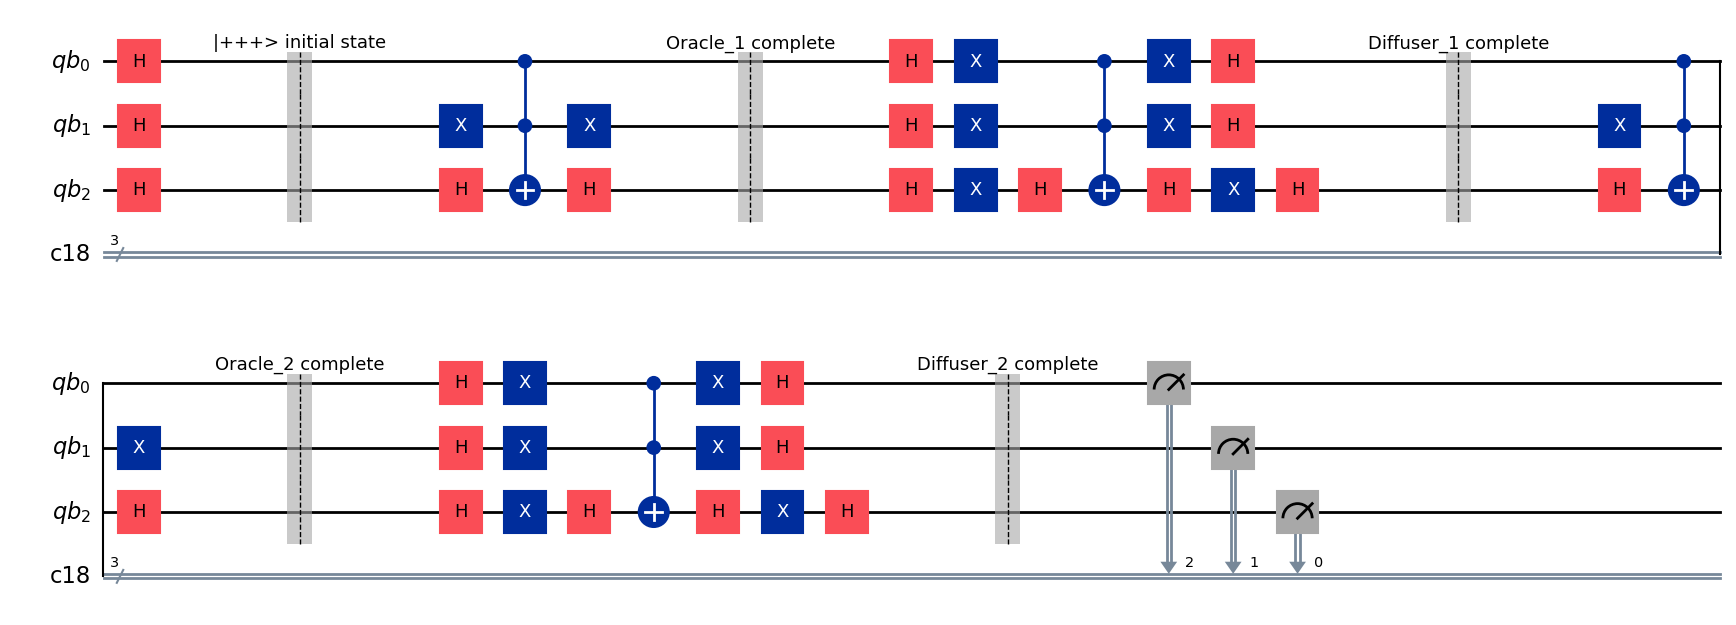

In [87]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
oracle_X(qc1,inp,1)
diffuser_X(qc1,1)
oracle_X(qc1,inp,2)
diffuser_X(qc1,2)
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

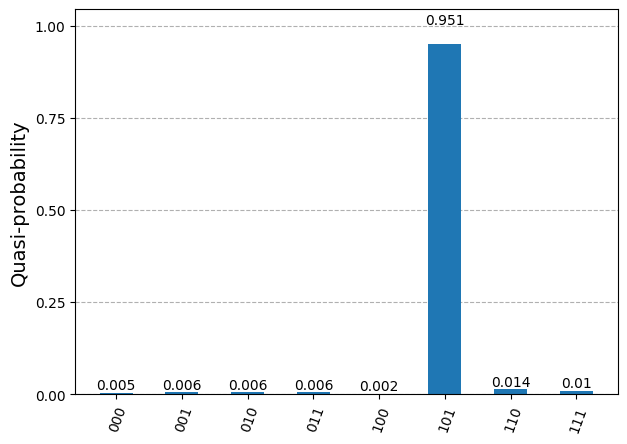

In [88]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see the output string appears with even higher probability of around 95%  which has incresed significantly from the previous around 80%

###Circuit with Oracle and Diffuser Apllied three times:

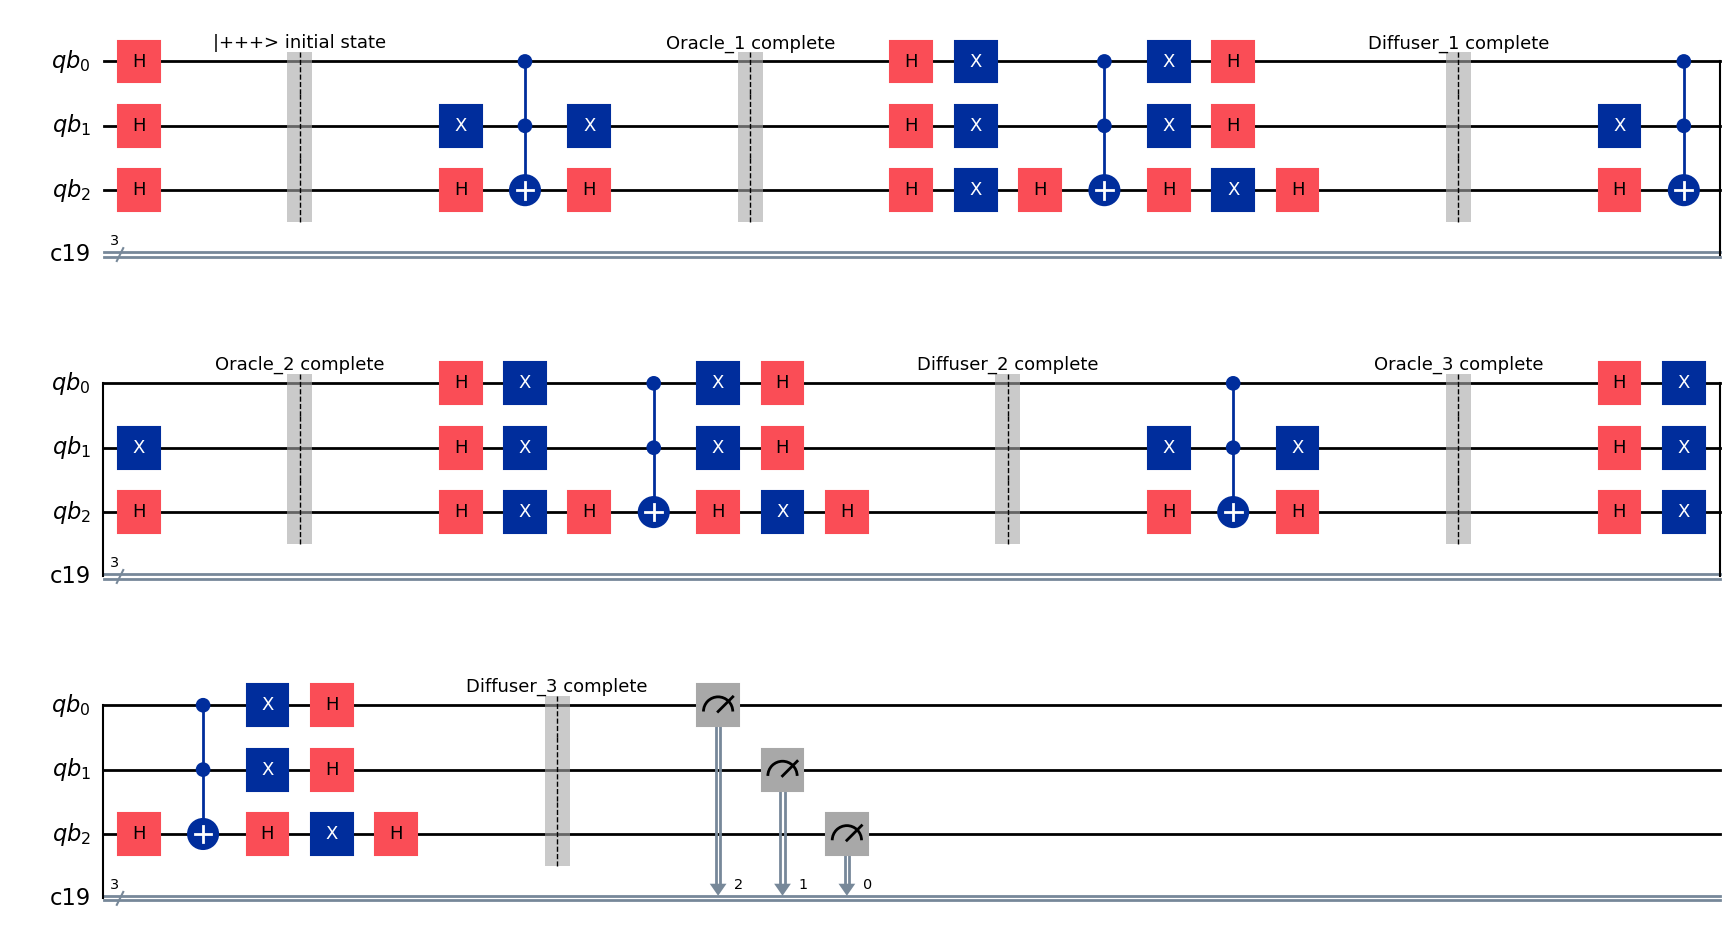

In [89]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
oracle_X(qc1,inp,1)
diffuser_X(qc1,1)
oracle_X(qc1,inp,2)
diffuser_X(qc1,2)
oracle_X(qc1,inp,3)
diffuser_X(qc1,3)
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

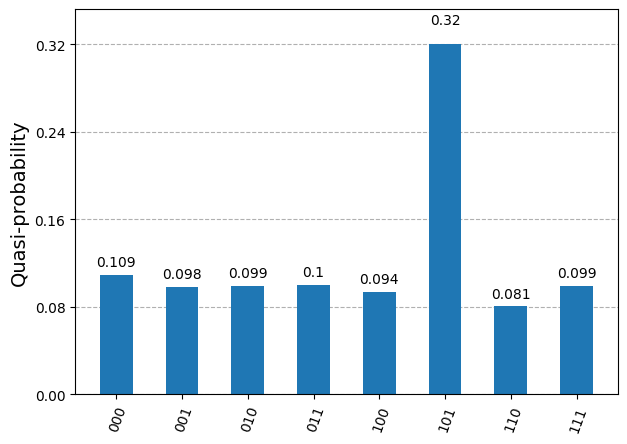

In [90]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see now the probabilies for the correct answer has again gone down

Hence we must apply the oracle diffuser pair a maximum of $⌊\sqrt n⌋$ for a database of n elements

**note: n isn't the number of qubit**

no. of qubits(q) = $log_2(n)$

for 3 qubits n=8

Hence $⌊\sqrt 8⌋$ = 2

##**Constraint 2.1 : X gates not allowed**

Similar to Constraint 2 .....If we want to run the same Quantum Circuit discussed abouve but we don't have access to X gate or Controlled X gates (controlled on any no. of qubits)

In this case we can modify the circuit such that every X gate is replaced by HZH gates

$X = HZH$


This way the enitire Grover Seach can be done using only Z and H and controlled Z gates without any ancillas.


We can further simplify the circuit by involking the fact:
$H^2 = 𝕀$


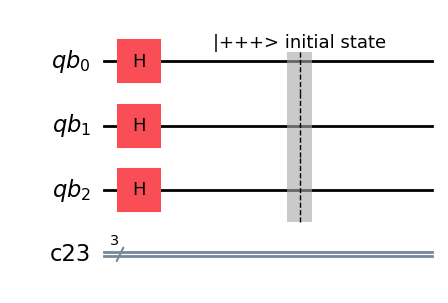

In [102]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
qc1.draw("mpl")

###**Input the element to be marked by the oracle:**

In [103]:
inp = input("enter a binary string of length 3 :    " )
if (len(inp)!=3):print("Invalid input: run cell again")

enter a binary string of length 3 :    010


In [104]:
def oracle_Z(qc,inp,n):
  for i in range(len(inp)):
    if inp[i]=='0':
      qc.h(qubits[i])
      qc.z(qubits[i])
      qc.h(qubits[i])

  qc.ccz(qubits[0],qubits[1],qubits[2])
  for i in range(len(inp)):
    if inp[i]=='0':
      qc.h(qubits[i])
      qc.z(qubits[i])
      qc.h(qubits[i])

  qc.barrier(label= f"Oracle_{n} complete")

In [105]:
def diffuser_Z(qc,n):
  qc.z(qubits)
  qc.h(qubits)

  qc.ccz(qubits[0],qubits[1],qubits[2])

  qc.h(qubits)
  qc.z(qubits)

  qc.barrier(label=f"Diffuser_{n} complete")

###Circuit for Oracle and diffuser applied once

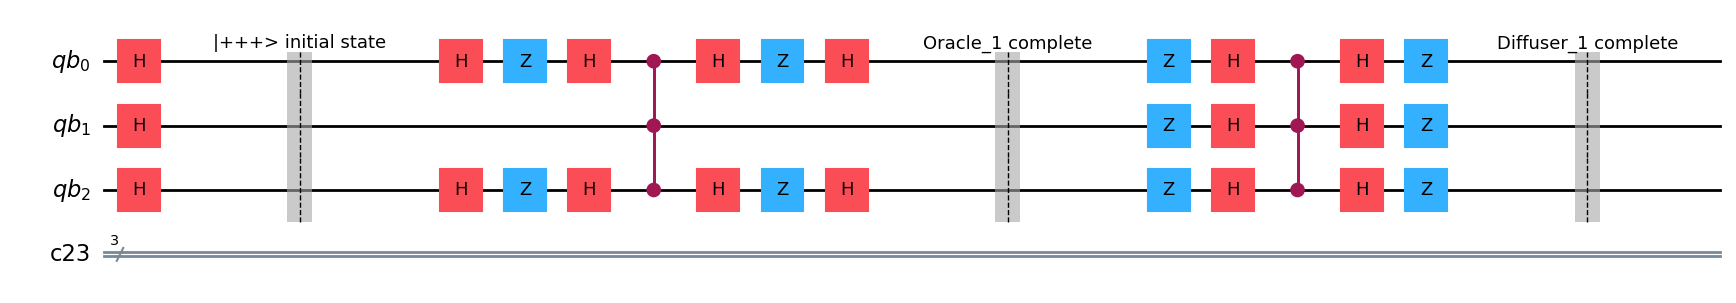

In [106]:
oracle_Z(qc1,inp,1)
diffuser_Z(qc1,1)
qc1.draw("mpl")

Measurement

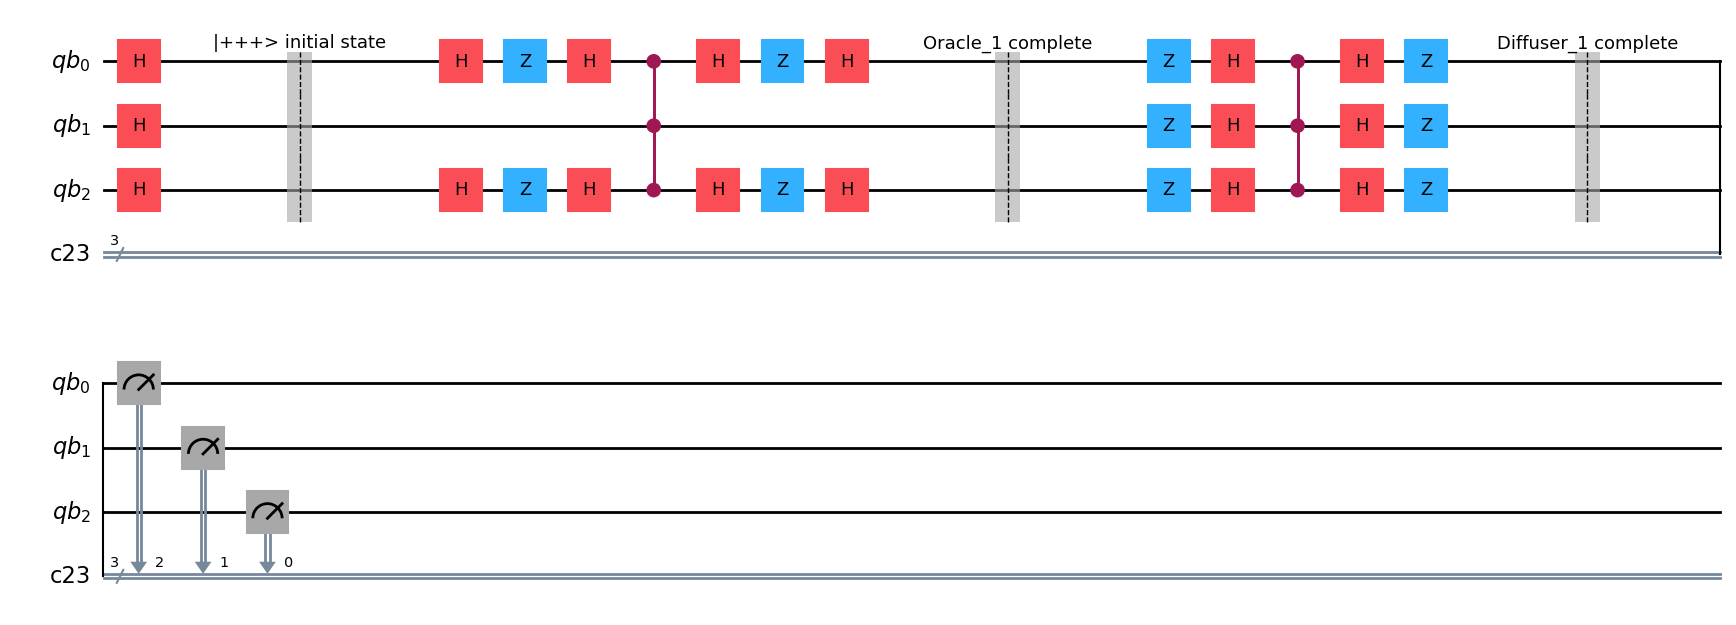

In [107]:
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

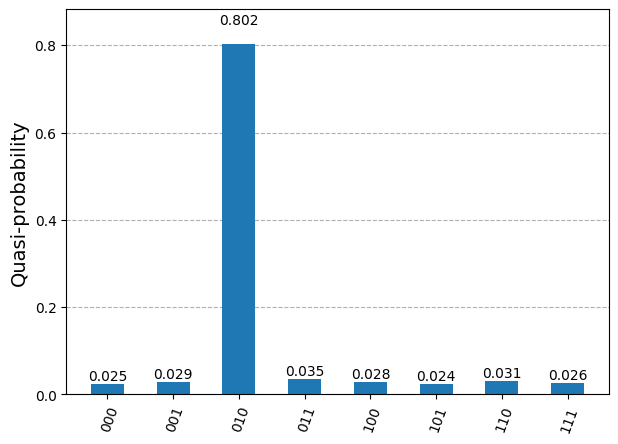

In [108]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see we get the marked string with high probability

###Circuit with Oracle and Diffuser Apllied twice:

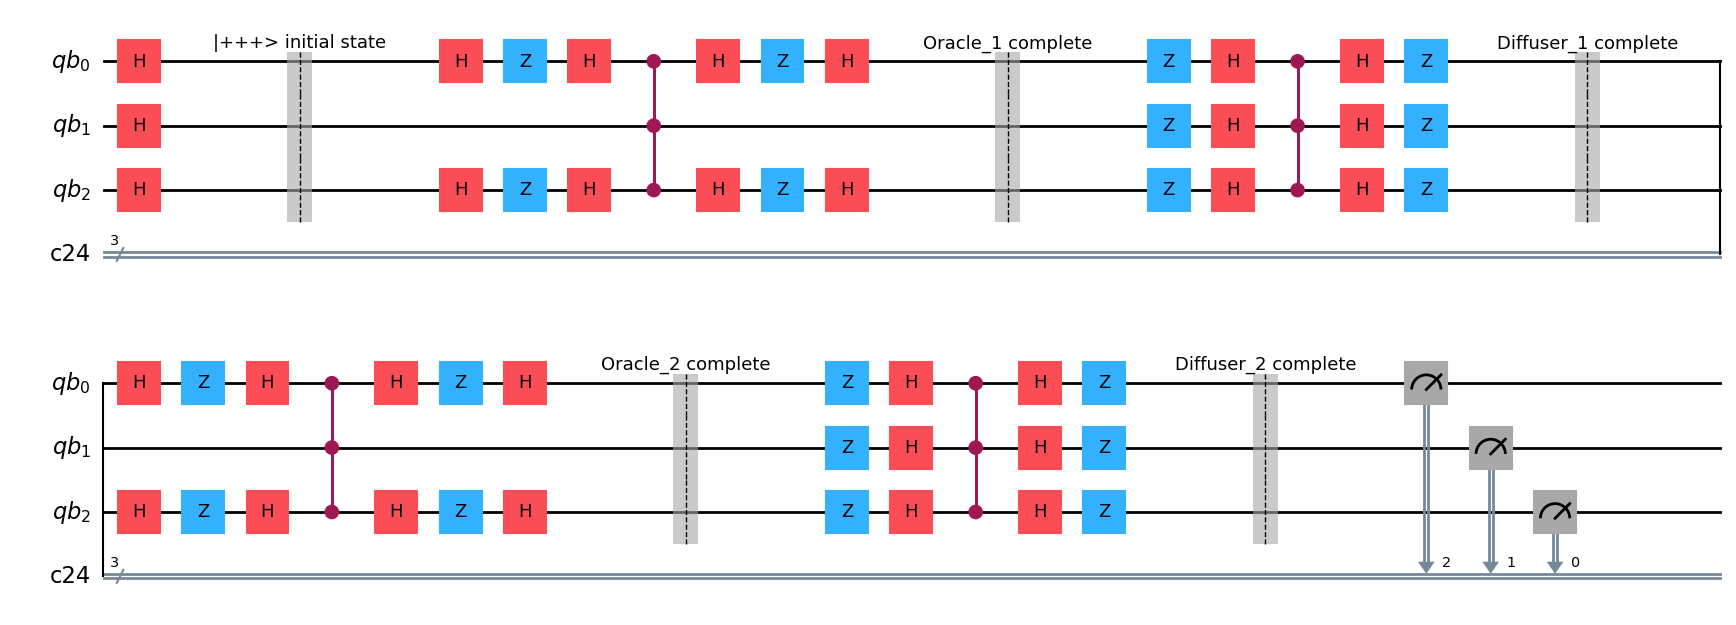

In [109]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
oracle_Z(qc1,inp,1)
diffuser_Z(qc1,1)
oracle_Z(qc1,inp,2)
diffuser_Z(qc1,2)
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

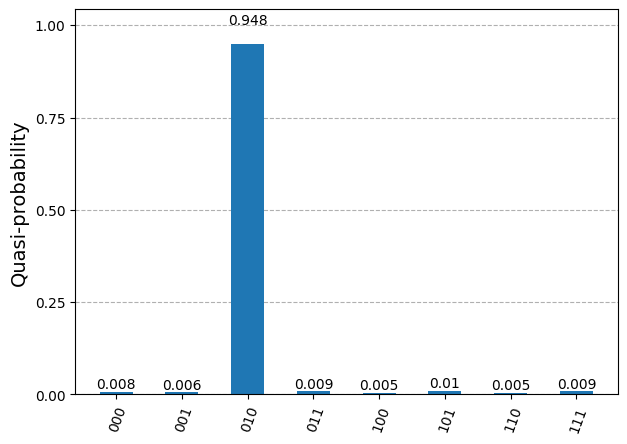

In [110]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see the output string appears with even higher probability of around 95%  which has incresed significantly from the previous around 80%

###Circuit with Oracle and Diffuser Apllied three times:

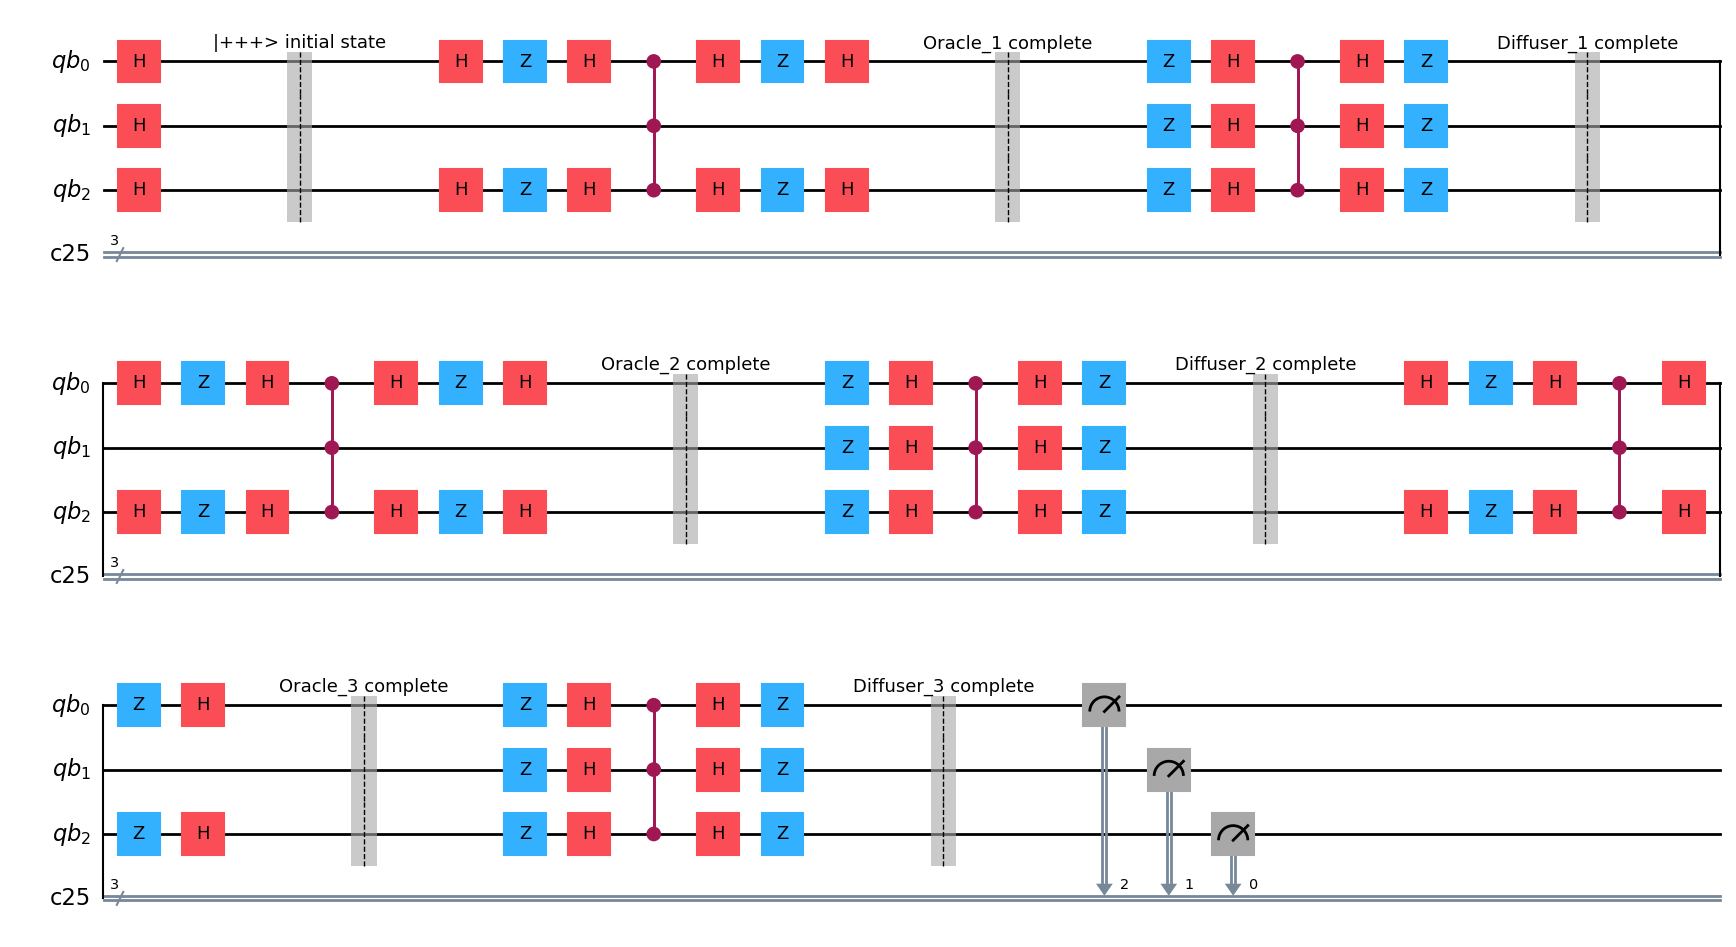

In [111]:
qubits = QuantumRegister(3, "qb")
output = ClassicalRegister(3)
qc1 = QuantumCircuit(qubits,output)
qc1.h(qubits)
qc1.barrier(label="|+++> initial state" )
oracle_Z(qc1,inp,1)
diffuser_Z(qc1,1)
oracle_Z(qc1,inp,2)
diffuser_Z(qc1,2)
oracle_Z(qc1,inp,3)
diffuser_Z(qc1,3)
qc1.measure(qubits[0],output[2])
qc1.measure(qubits[1],output[1])
qc1.measure(qubits[2],output[0])
qc1.draw("mpl")

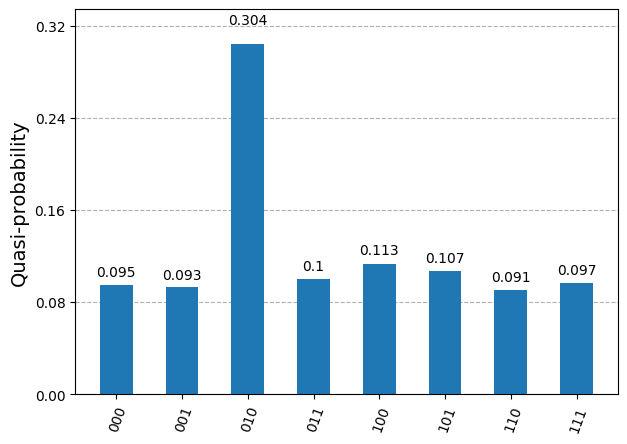

In [112]:
simulator_aer = AerSimulator()
qc_aer = transpile(qc1,backend=simulator_aer)
result = simulator_aer.run(qc_aer,shots=1000).result()
counts = result.get_counts()
plot_distribution(counts)

As we see now the probabilies for the correct answer has again gone down

Hence we must apply the oracle diffuser pair a maximum of $⌊\sqrt n⌋$ for a database of n elements

**note: n isn't the number of qubit**

no. of qubits(q) = $log_2(n)$

for 3 qubits n=8

Hence $⌊\sqrt 8⌋$ = 2